In [1]:
# This example demonstrates the creation of a Bell state using qstack.
# A Bell state is a maximally entangled quantum state of two qubits.
# The program uses a toy layer to define the quantum operations.
import qstack

program = None

In [2]:
%%qstack
@instruction-set: toy

allocate q1 q2:
  mix q1
  entangle q1 q2
measure

[Kernel(target=QubitId(value='q1'), instructions=(Kernel(target=QubitId(value='q2'), instructions=(QuantumInstruction(name='mix', targets=[QubitId(value='q1')], parameters={}), QuantumInstruction(name='entangle', targets=[QubitId(value='q1'), QubitId(value='q2')], parameters={})), callback=None),), callback=None)]

In [3]:
# Set up a local quantum machine to execute the program.
# Each machine in qstack is created to target a specific stack or instruction set.
# This ensures that the machine can correctly interpret and execute the program's instructions.
from qstack.machine import local_machine_for

machine = local_machine_for(program.instruction_set)


In [4]:
# Perform a single-shot execution of the program.
# A single-shot execution runs the program once and returns the measurement outcomes.
# This is useful for observing the result of a single execution of the quantum program.
machine.single_shot(program)


(0, 0)

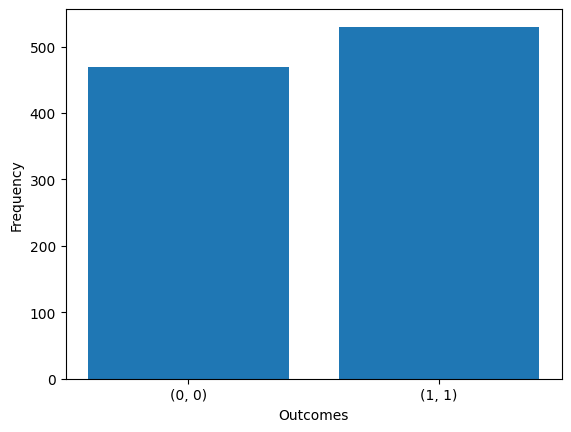

In [5]:
# Evaluate the program multiple times and plot the resulting histogram.
machine.eval(program).plot_histogram()


In [6]:
# Notice that kernels work on only one qubit at a time, and:
#   allocate q1 q2:
#   measure
# is just syntactic sugar for:
#   allocate q1:
#     allocate q2:
#     measure
#   measure
# as reflected when we print the actual compiled program:
print(program)

@instruction-set: toy

allocate q1:
  allocate q2:
    mix q1
    entangle q1 q2
  measure
measure
